# Intro

This notebook was taken from kaggle and updated for the puprose of the MLOps course.

* Source notbebook: https://www.kaggle.com/code/abhishek0032/titanic-survival-prediction-feature-engineering/notebook
* Datasets: https://www.kaggle.com/competitions/titanic/data

In this lab, you need to:
1. Run this notebook and understand it
2. Transform it into scripts
3. Move code into classes and use them in scripts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('../data/titanic/train.csv')
test=pd.read_csv('../data/titanic/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## Data Cleaning

In [4]:
test.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [5]:
train.sample(20)

PassengerId  Survived  Pclass  \
736          737         0       3   
507          508         1       1   
295          296         0       1   
597          598         0       3   
500          501         0       3   
730          731         1       1   
846          847         0       3   
307          308         1       1   
877          878         0       3   
816          817         0       3   
648          649         0       3   
494          495         0       3   
342          343         0       2   
422          423         0       3   
702          703         0       3   
426          427         1       2   
575          576         0       3   
670          671         1       2   
151          152         1       1   
635          636         1       2   

                                                  Name     Sex   Age  SibSp  \
736            Ford, Mrs. Edward (Margaret Ann Watson)  female  48.0      1   
507      Bradley, Mr. George ("George Arthur Brayton")    male   NaN      0   
295                                  Lewy, Mr. Ervin G    male   NaN      0   
597                                Johnson, Mr. Alfred    male  49.0      0   
500                                   Calic, Mr. Petar    male  17.0      0   
730                      Allen, Miss. Elisabeth Walton  female  29.0      0   
846                           Sage, Mr. Douglas Bullen    male   NaN      8   
307  Penasco y Castellana, Mrs. Victor de Satode (M...  female  17.0      1   
877                               Petroff, Mr. Nedelio    male  19.0      0   
816                       Heininen, Miss. Wendla Maria  female  23.0      0   
648                                 Willey, Mr. Edward    male   NaN      0   
494                         Stanley, Mr. Edward Roland    male  21.0      0   
342                         Collander, Mr. Erik Gustaf    male  28.0      0   
422                                 Zimmerman, Mr. Leo    male  29.0      0   
702                              Barbara, Miss. Saiide  female  18.0      0   
426        Clarke, Mrs. Charles V (Ada Maria Winfield)  female  28.0      1   
575                               Patchett, Mr. George    male  19.0      0   
670  Brown, Mrs. Thomas William Solomon (Elizabeth ...  female  40.0      1   
151                  Pears, Mrs. Thomas (Edith Wearne)  female  22.0      1   
635                                  Davis, Miss. Mary  female  28.0      0   

     Parch            Ticket      Fare Cabin Embarked  
736      3        W./C. 6608   34.3750   NaN        S  
507      0            111427   26.5500   NaN        S  
295      0          PC 17612   27.7208   NaN        C  
597      0              LINE    0.0000   NaN        S  
500      0            315086    8.6625   NaN        S  
730      0             24160  211.3375    B5        S  
846      2          CA. 2343   69.5500   NaN        S  
307      0          PC 17758  108.9000   C65        C  
877      0            349212    7.8958   NaN        S  
816      0  STON/O2. 3101290    7.9250   NaN        S  
648      0     S.O./P.P. 751    7.5500   NaN        S  
494      0         A/4 45380    8.0500   NaN        S  
342      0            248740   13.0000   NaN        S  
422      0            315082    7.8750   NaN        S  
702      1              2691   14.4542   NaN        C  
426      0              2003   26.0000   NaN        S  
575      0            358585   14.5000   NaN        S  
670      1             29750   39.0000   NaN        S  
151      0            113776   66.6000    C2        S  
635      0            237668   13.0000   NaN        S

### Handling Null Values

The 'Cabin' column contains numerous null values, so we will drop it.



In [6]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [7]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [9]:
train['Embarked'].fillna('S',inplace=True)

In [10]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

### Creating a Unified DataFrame for Easier Manipulation


In [11]:
df=pd.concat([train,test],sort=True).reset_index(drop=True)

In [12]:
df.shape

(1309, 11)

In [13]:
df.head()

Age Embarked     Fare                                               Name  \
0  22.0        S   7.2500                            Braund, Mr. Owen Harris   
1  38.0        C  71.2833  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2  26.0        S   7.9250                             Heikkinen, Miss. Laina   
3  35.0        S  53.1000       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4  35.0        S   8.0500                           Allen, Mr. William Henry   

   Parch  PassengerId  Pclass     Sex  SibSp  Survived            Ticket  
0      0            1       3    male      1       0.0         A/5 21171  
1      0            2       1  female      1       1.0          PC 17599  
2      0            3       3  female      0       1.0  STON/O2. 3101282  
3      0            4       1  female      1       1.0            113803  
4      0            5       3    male      0       0.0            373450

In [14]:
df.corr(numeric_only=True)['Age'].abs()

Age            1.000000
Fare           0.178314
Parch          0.150917
PassengerId    0.028814
Pclass         0.408106
SibSp          0.243699
Survived       0.077221
Name: Age, dtype: float64

In [15]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [16]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [17]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

### Extracting Titles from Names and Adding as a Separate Column


In [18]:
df['Title']=df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]

In [19]:
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [20]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [21]:
df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

### Creating a Family Column by Combining Sibling and Parent Child Column



In [22]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1

In [23]:
df.sample(10)

Age Embarked      Fare                                      Name  \
403   28.0        S   15.8500            Hakkarainen, Mr. Pekka Pietari   
143   19.0        Q    6.7500                       Burke, Mr. Jeremiah   
797   31.0        S    8.6833                          Osman, Mrs. Mara   
1121  14.0        S   65.0000               Sweet, Mr. George Frederick   
541    9.0        S   31.2750      Andersson, Miss. Ingeborg Constanzia   
888   22.0        S   23.4500  Johnston, Miss. Catherine Helen "Carrie"   
894   27.0        S    8.6625                          Wirz, Mr. Albert   
435   14.0        S  120.0000                 Carter, Miss. Lucile Polk   
1244  49.0        S   65.0000                        Herman, Mr. Samuel   
475   42.0        S   52.0000               Clifford, Mr. George Quincy   

      Parch  PassengerId  Pclass     Sex  SibSp  Survived            Ticket  \
403       0          404       3    male      1       0.0  STON/O2. 3101279   
143       0          144       3    male      0       0.0            365222   
797       0          798       3  female      0       1.0            349244   
1121      0         1122       2    male      0       NaN            220845   
541       2          542       3  female      4       0.0            347082   
888       2          889       3  female      1       0.0        W./C. 6607   
894       0          895       3    male      0       NaN            315154   
435       2          436       1  female      1       1.0            113760   
1244      2         1245       2    male      1       NaN            220845   
475       0          476       1    male      0       0.0            110465   

     Title  Family_size  
403     Mr            2  
143     Mr            1  
797    Mrs            1  
1121    Mr            1  
541   Miss            7  
888   Miss            4  
894     Mr            1  
435   Miss            4  
1244    Mr            4  
475     Mr            1

In [24]:
df.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)

In [25]:
df.sample(10)

Age Embarked     Fare  PassengerId  Pclass     Sex  Survived   Title  \
170   61.0        S  33.5000          171       1    male       0.0      Mr   
614   35.0        S   8.0500          615       3    male       0.0      Mr   
512   36.0        S  26.2875          513       1    male       1.0      Mr   
202   34.0        S   6.4958          203       3    male       0.0      Mr   
460   48.0        S  26.5500          461       1    male       1.0      Mr   
1235  25.0        S  14.5000         1236       3    male       NaN  Master   
482   50.0        S   8.0500          483       3    male       0.0      Mr   
1067  20.0        S  36.7500         1068       2  female       NaN    Miss   
901   25.0        S   7.8958          902       3    male       NaN      Mr   
676   24.5        S   8.0500          677       3    male       0.0      Mr   

      Family_size  
170             1  
614             1  
512             1  
202             1  
460             1  
1235            3  
482             1  
1067            1  
901             1  
676             1

In [26]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [27]:
df['Family_size']=df['Family_size'].apply(family_size)


## Exploratory Data Analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 92.2+ KB


In [29]:
df['Age'] = df['Age'].astype('int64')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   int64  
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 92.2+ KB


### Finding Survival Correlation with Every Other Column

We will analyze the correlation between survival and every other column to understand their relationships.


In [31]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.161290
2       Small  0.578767
---------- 



### Adding Graphs to Clarify the Picture

We will include some visualizations to make the data and its correlations clearer.


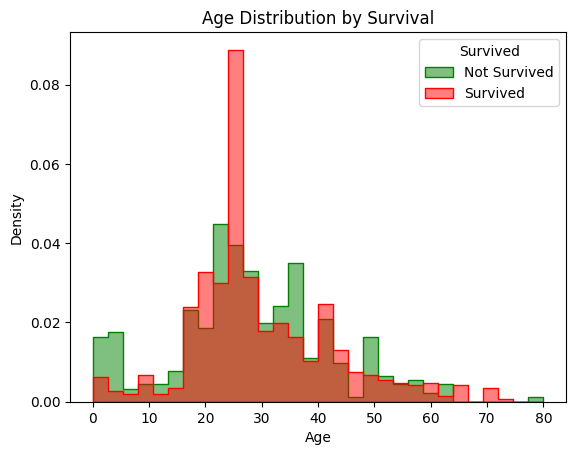

In [32]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=False, element='step', stat='density', common_norm=False, palette={0: 'red', 1: 'green'}, alpha=0.5)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


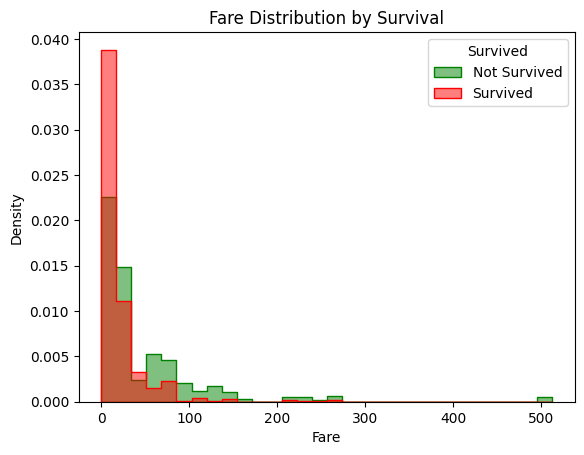

In [33]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=False, element='step', stat='density', common_norm=False, palette={0: 'red', 1: 'green'}, alpha=0.5)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


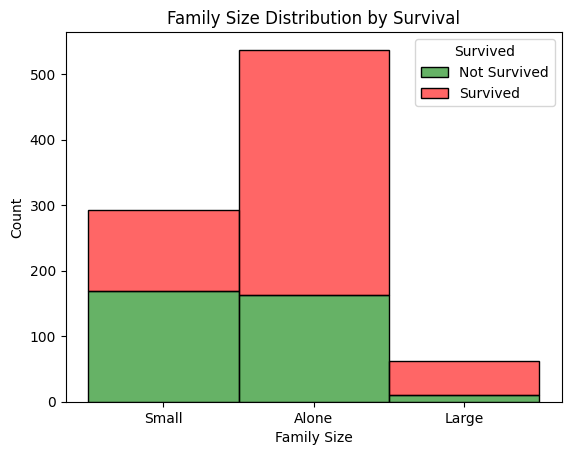

In [34]:
sns.histplot(data=df, x='Family_size', hue='Survived', multiple='stack', palette={0: 'red', 1: 'green'}, alpha=0.6)
plt.title('Family Size Distribution by Survival')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


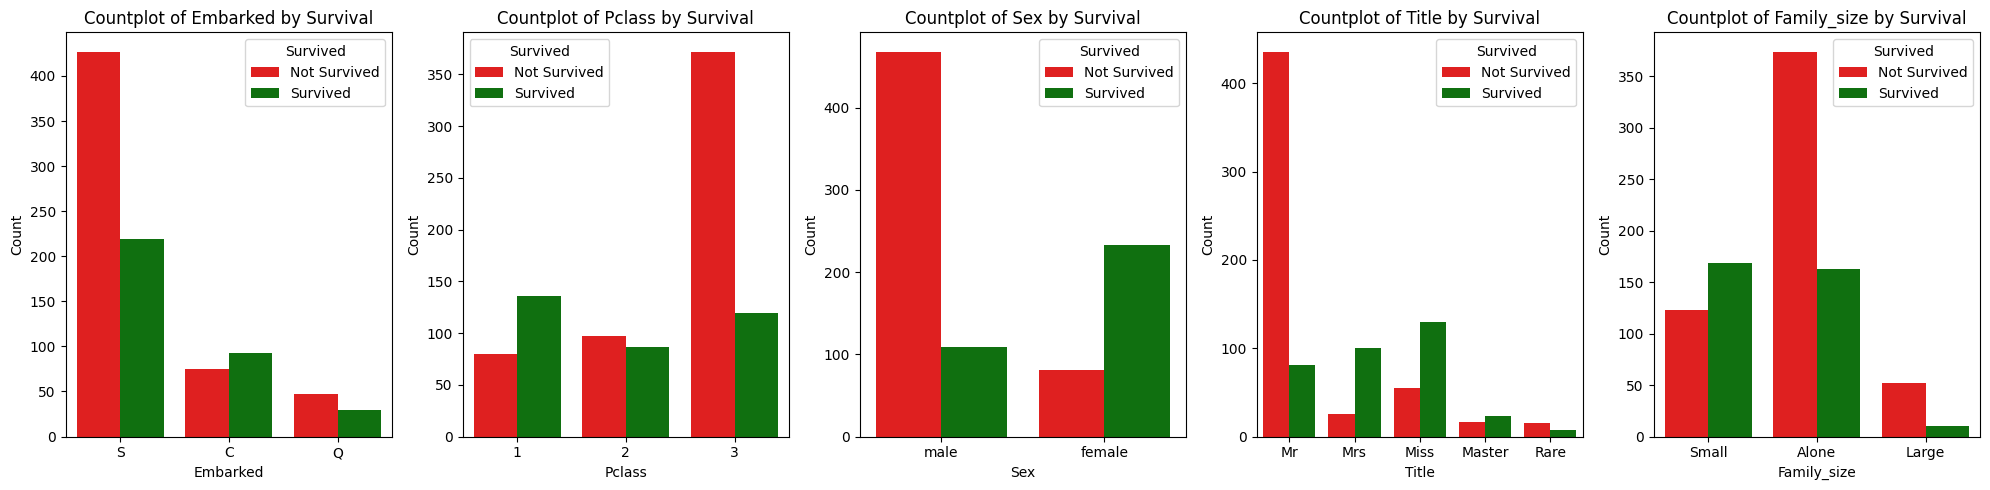

In [35]:
fig, axes = plt.subplots(1, len(col), figsize=(20, 5))

for i, c in enumerate(col):
    sns.countplot(data=df, x=c, hue='Survived', palette={0: 'red', 1: 'green'}, ax=axes[i])
    axes[i].set_title(f'Countplot of {c} by Survival')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Survived', labels=['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()


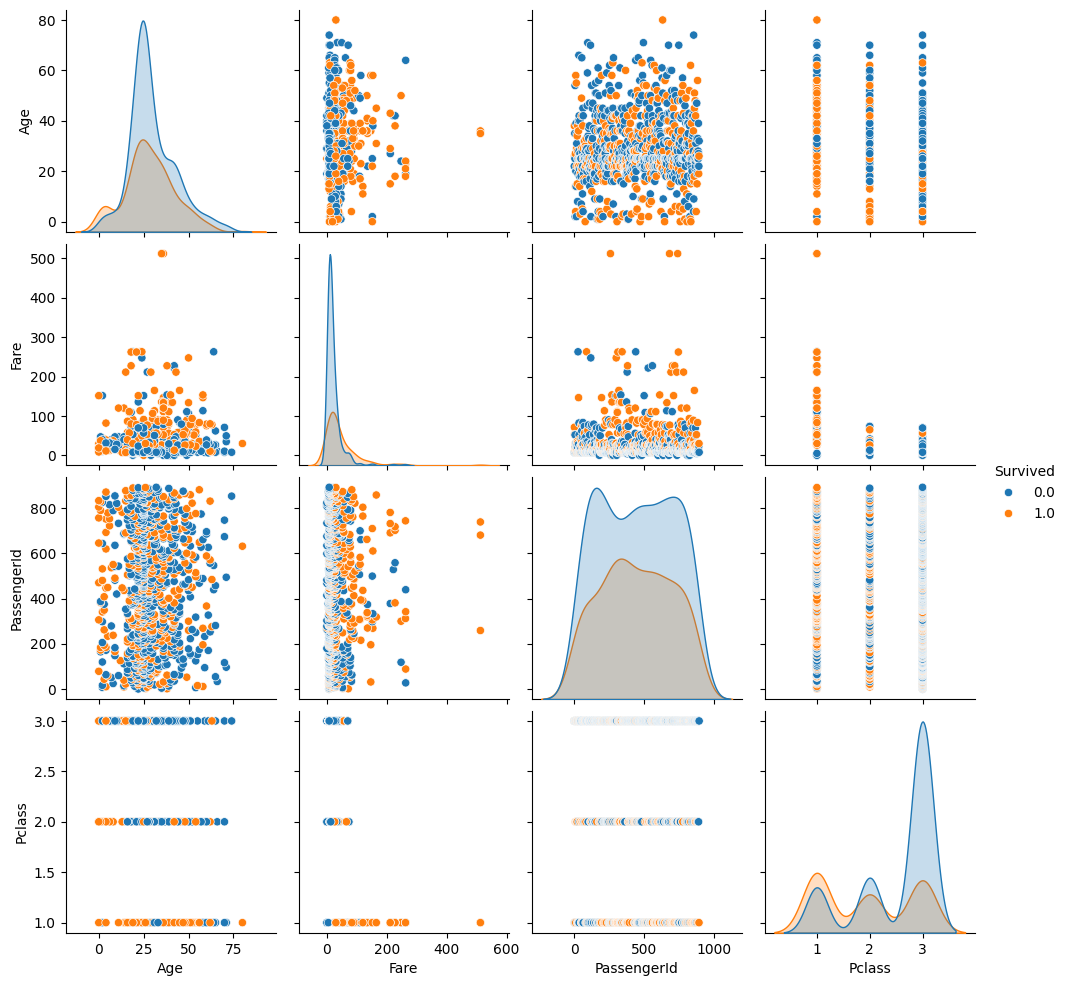

In [36]:
sns.pairplot(df,hue='Survived')

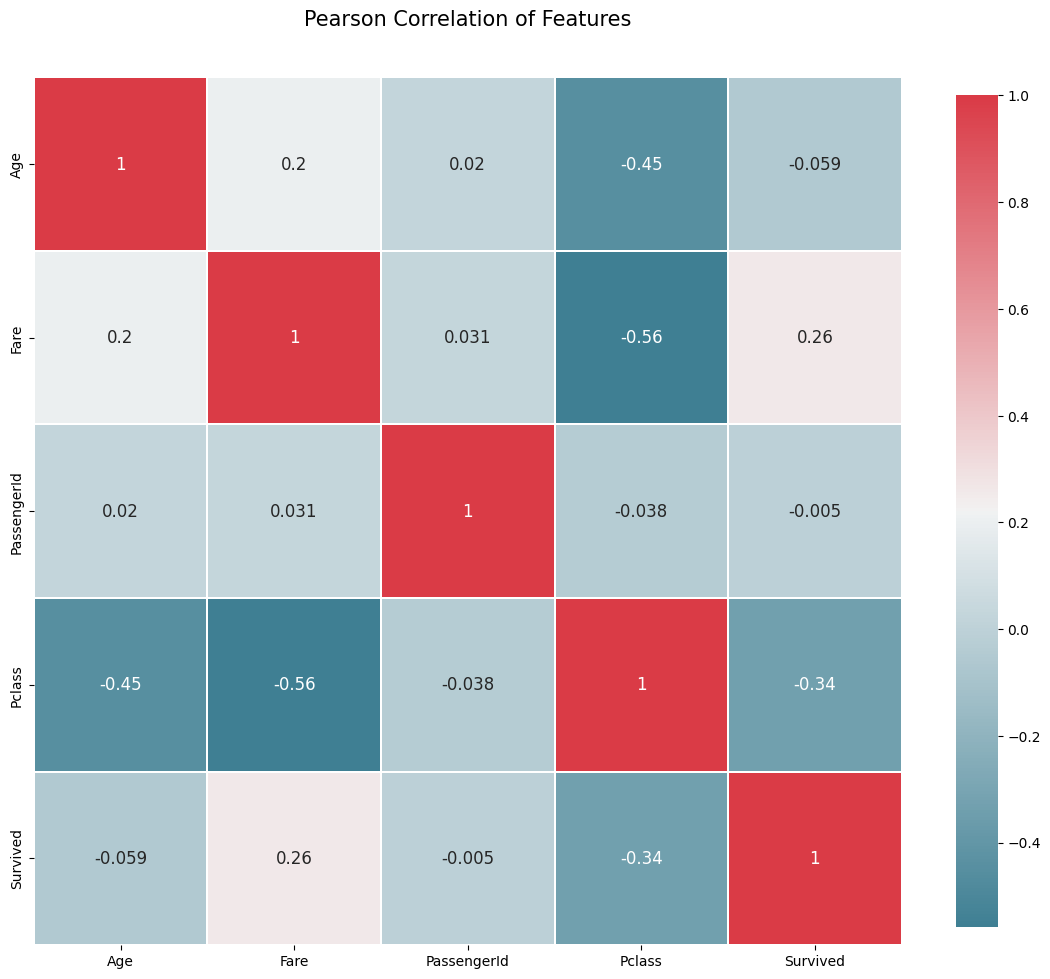

In [37]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(numeric_only=True), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


## Feature EngineeringÂ¶

In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
# from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


In [38]:
df.head()

Age Embarked     Fare  PassengerId  Pclass     Sex  Survived Title  \
0   22        S   7.2500            1       3    male       0.0    Mr   
1   38        C  71.2833            2       1  female       1.0   Mrs   
2   26        S   7.9250            3       3  female       1.0  Miss   
3   35        S  53.1000            4       1  female       1.0   Mrs   
4   35        S   8.0500            5       3    male       0.0    Mr   

  Family_size  
0       Small  
1       Small  
2       Alone  
3       Small  
4       Alone

### Separating the Data into Train and Test Sets

We will divide the data into training and testing sets to evaluate the model's performance.


In [41]:
train = df.loc[:890]
test = df.loc[891:]

In [42]:
test.head()

Age Embarked     Fare  PassengerId  Pclass     Sex  Survived Title  \
891   34        Q   7.8292          892       3    male       NaN    Mr   
892   47        S   7.0000          893       3  female       NaN   Mrs   
893   62        Q   9.6875          894       2    male       NaN    Mr   
894   27        S   8.6625          895       3    male       NaN    Mr   
895   22        S  12.2875          896       3  female       NaN   Mrs   

    Family_size  
891       Alone  
892       Small  
893       Alone  
894       Alone  
895       Small

In [43]:
test.drop(columns=['Survived'],inplace=True)

In [44]:
train['Survived'] = train['Survived'].astype('int64')

In [45]:
train.head()

Age Embarked     Fare  PassengerId  Pclass     Sex  Survived Title  \
0   22        S   7.2500            1       3    male         0    Mr   
1   38        C  71.2833            2       1  female         1   Mrs   
2   26        S   7.9250            3       3  female         1  Miss   
3   35        S  53.1000            4       1  female         1   Mrs   
4   35        S   8.0500            5       3    male         0    Mr   

  Family_size  
0       Small  
1       Small  
2       Alone  
3       Small  
4       Alone

In [46]:
train.shape,test.shape

((891, 9), (418, 8))

In [47]:
train = train.drop("PassengerId", axis=1)

In [48]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

In [49]:
X_train.head()

Age Embarked     Fare  Pclass     Sex Title Family_size
0   22        S   7.2500       3    male    Mr       Small
1   38        C  71.2833       1  female   Mrs       Small
2   26        S   7.9250       3  female  Miss       Alone
3   35        S  53.1000       1  female   Mrs       Small
4   35        S   8.0500       3    male    Mr       Alone

In [50]:
X_train.shape,y_train.shape

((891, 7), (891,))

### Creating a Pipeline with Column Transformer

We will build a pipeline that incorporates a Column Transformer to streamline preprocessing and feature engineering.


In [51]:
num_cat_tranformation=ColumnTransformer([
                                    ('scaling',MinMaxScaler(),[0,2]),
                                    ('onehotencolding1',OneHotEncoder(),[1,3]),
                                    ('ordinal',OrdinalEncoder(),[4]),
                                    ('onehotencolding2',OneHotEncoder(),[5,6])
                                    ],remainder='passthrough')

In [52]:
bins=ColumnTransformer([
                        ('Kbins',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[0,2]),
                        ],remainder='passthrough')

In [53]:
from sklearn import set_config
set_config(display='diagram')

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)

In [64]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo)
    ])

In [ ]:
df

## Model Training

### Evaluating Various Machine Learning Models to Find the Best Performer

We will test different machine learning models to identify which one provides the best performance for our data.


In [56]:
algorithms=[
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # XGBoost
    ## XGBClassifier()
]

In [57]:
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    pipeline = create_pipeline(algo)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    model_names.append(algo.__class__.__name__)
    CV_Accuracy.append(scores.mean())
    
#     print(f'Model: {algo.__class__.__name__}, CV Accuracy: {scores.mean()}')
#     print('\n')

In [58]:
model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [59]:
model_df.sort_values(by='Accuracy', ascending=False, inplace=True)

### Tuning the Top 3 Machine Learning Models for Better Results

We will focus on tuning the top 3 performing models from our data frame to enhance their performance and achieve better results.


In [60]:
model_df

Model  Accuracy
16                      LinearSVC  0.839929
8               RidgeClassifierCV  0.838521
19     LinearDiscriminantAnalysis  0.838521
6            LogisticRegressionCV  0.838511
0              AdaBoostClassifier  0.832887
5       GaussianProcessClassifier  0.831488
15                          NuSVC  0.827332
3      GradientBoostingClassifier  0.825854
14                            SVC  0.818921
12                     GaussianNB  0.818871
13           KNeighborsClassifier  0.817423
11                    BernoulliNB  0.810490
4          RandomForestClassifier  0.796356
1               BaggingClassifier  0.793519
2            ExtraTreesClassifier  0.779494
10                     Perceptron  0.776677
18            ExtraTreeClassifier  0.775278
17         DecisionTreeClassifier  0.773830
7     PassiveAggressiveClassifier  0.760051
9                   SGDClassifier  0.709258
20  QuadraticDiscriminantAnalysis  0.581749

In [61]:
algo1 = ensemble.RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

algo2 =ensemble.GradientBoostingClassifier(max_depth= 1, max_features='auto', n_estimators=3, random_state=42, warm_start= True)
algo3=linear_model.RidgeClassifierCV()

In [62]:
pipe1=Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo1)
    ])

In [63]:
pipe1.fit(X_train,y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [ ]:
y_pred = pipe1.predict(X_test)
accuracy_score(y_test,y_pred)
